# Effective Pandas
Starting from Chapter 14, and progressing until the notebook length becomes challenging.  Likely 200-300 lines of code across a number of cell.  Initiate notebook with data sets being leveraged in prior notebooks to facilitate continuation.

- Car data notebook with mpg data
- World cup history datasource
- Snow resort precipitation records

### Imports
Minimum imports to follow allong are pandas and numpy.  Potential to add matplotlib at a later point.  Unclear if this is needed at this time.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Bad value in file WindowsPath('C:/Users/KNHOFFM/.matplotlib/stylelib/xom.mplstyle'), line 11 ('lines.color: #0C479D'): Key lines.color: '' does not look like a color arg
Bad value in file WindowsPath('C:/Users/KNHOFFM/.matplotlib/stylelib/xom.mplstyle'), line 15 ('patch.edgecolor: #FFFFFF'): Key patch.edgecolor: '' does not look like a color arg
Bad value in file WindowsPath('C:/Users/KNHOFFM/.matplotlib/stylelib/xom.mplstyle'), line 16 ('patch.facecolor: #0C479D'): Key patch.facecolor: '' does not look like a color arg


### Datasets

In [2]:
cars = pd.read_csv("vehicles.csv")

c:\users\knhoffm\.virtualenvs\python_for_engineer_science\lib\site-packages\IPython\core\interactiveshell.py:3378: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
fifa = pd.read_csv("international_matches.csv")

In [4]:
alta_df = pd.read_csv('alta-noaa-1980-2019.csv')

### Column break out
During the prior chapters a few columns have been broken out by the author to conduct Serie specific work.  These will be extracted away from the cars dataset.

In [5]:
city_mpg = cars.city08
hwy_mpg = cars.highway08

In [6]:
make = cars.make

In [7]:
dates = pd.to_datetime(alta_df.DATE)

# Chapter 14 Plotting
This chapter will focus on the use of plotting as a way to interegate the data and the code created to manipulate the information. This is a key skill in establishing an understanding of the overall problem, and to a greater extent allowing others to step into the same discussion effectively.  As the chapter progresses the focus will be on statistical plotting of a series, but the same techniques will apply in the construct of dataframes.

In [8]:
snow = (alta_df
        .SNOW
        .rename(dates)
       )

In [9]:
snow

1980-01-01    2.0
1980-01-02    3.0
1980-01-03    1.0
1980-01-04    0.0
1980-01-05    0.0
             ... 
2019-12-27    0.0
2019-12-28    3.2
2019-12-29    3.8
2019-12-30    2.4
2019-12-31    0.0
Name: SNOW, Length: 14276, dtype: float64

## Plotting a series
There are a focused group of options available for interogating a single column or field of data.  Surprisingly, it is more options than might be expected, and when incorporating options for regrouping and aggregating the information, the outputs are nearly infinite for evaluation. Base plot types:
- bar
- barh
- box
- hist
- kde
- line
- pie

### Histograms
Very functional way to see your data frequency understanding how much of the results fall in certain areas(distribution), the tendancy (skew), and spread (deviation).

In [10]:
plt.style.use('xom')

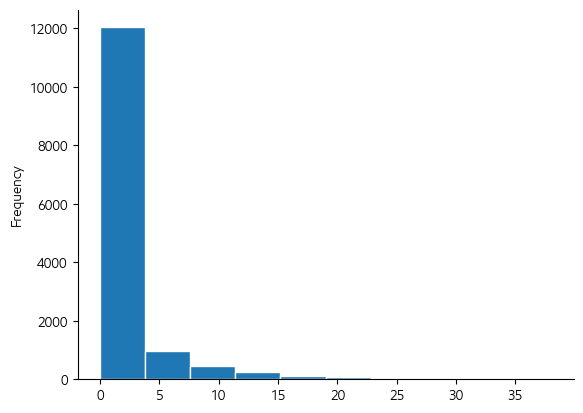

In [11]:
snow.plot.hist(edgecolor='white');

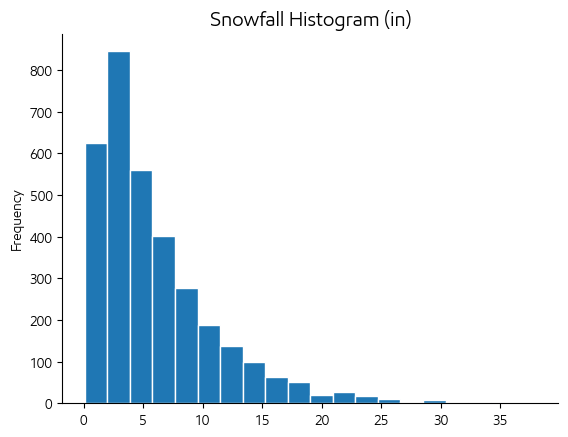

In [12]:
snow[snow>0].plot.hist(bins=20, title="Snowfall Histogram (in)", edgecolor="white");

### Box Plots
An excellent way to show distribution of different categrories within a column of data.  This technically requires a second column or an index which has groupable data.  Using date information below to compare January snowfall data points to understand average daily snowfall and distribution in the month across the dataset.  **4 IN per DAY in JAN on AVG**

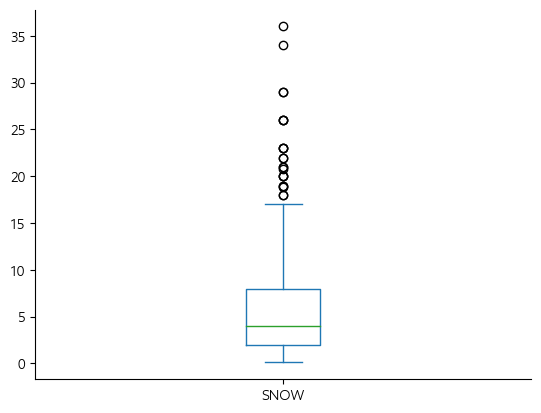

In [13]:
(snow
 [lambda s: (s.index.month == 1) & (s>0)]
 .plot.box()
);

### Kernel Density Estimation Plot (KDE)
Great for use when you want to see a continuous distribution in place of a discrete group basis in a traditional histogram.  This can be harder to understand sometime, but it is a frequency plot similar to the histogram.

<AxesSubplot: ylabel='Density'>

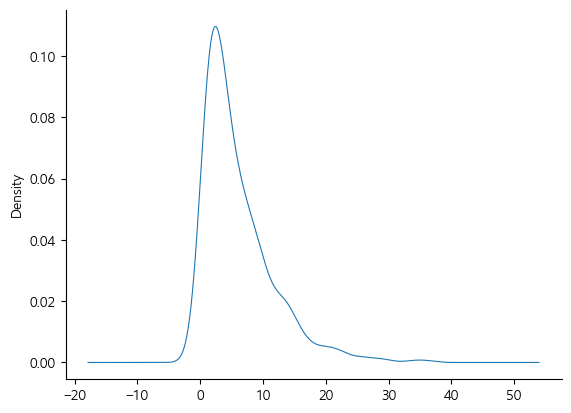

In [14]:
(snow
 [lambda s: (s.index.month==1) & (s>0)]
 .plot.kde()
)

### Line Plots
The most basic plot type, and the default for the plotting system is the line plot.  These are the most useful type when dealing with time series data so the trend over time can be determined for the measure in question.  This is also where rolling windows and resampling can provide a lot of assistance in understanding macro versus micro trends.  

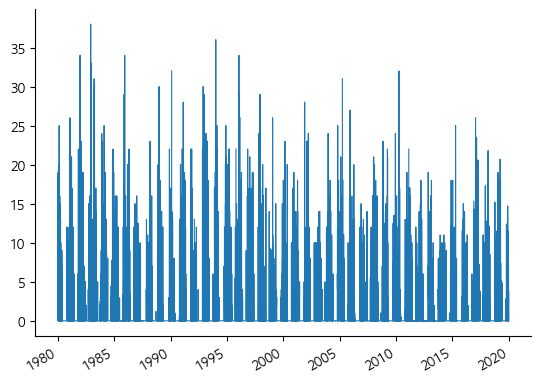

In [15]:
(snow
 .plot()
);

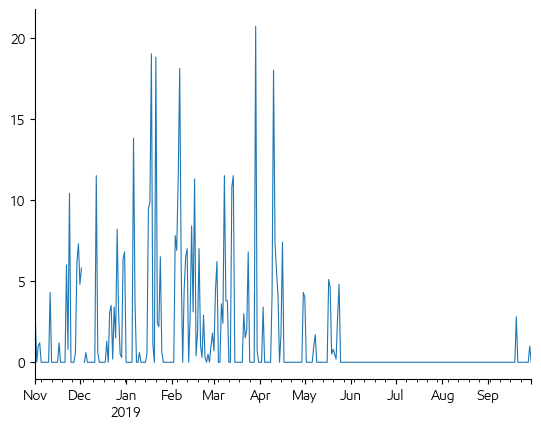

In [16]:
# trimming the data for a view of the last year using loc to make the range intuitive
(snow
 .loc['2018-11':'2019-09']
 .plot()
);

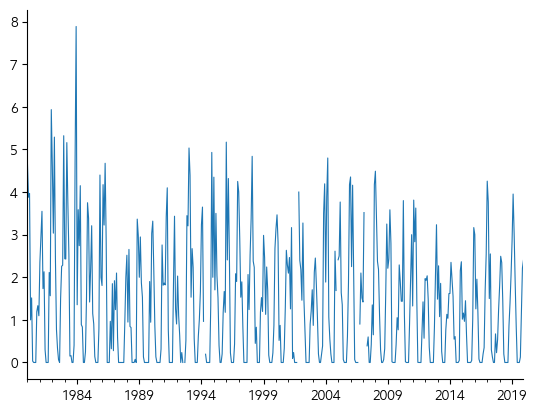

In [17]:
# trimming the data for a view of the last year using loc to make the range intuitive
(snow
 .resample('M')
 .mean()
 .plot()
);

### Line plots with multiple aggregations
Plotting can be even more powerful with DataFrames.  To provide an example of this process, the existing single column Series for snowfall will be resampled quarterly to determine the 50, 90, and 99 quantiles.  This will be unstacked creating a dataframe, and then plotted as seperate lines across the 40 years of data.

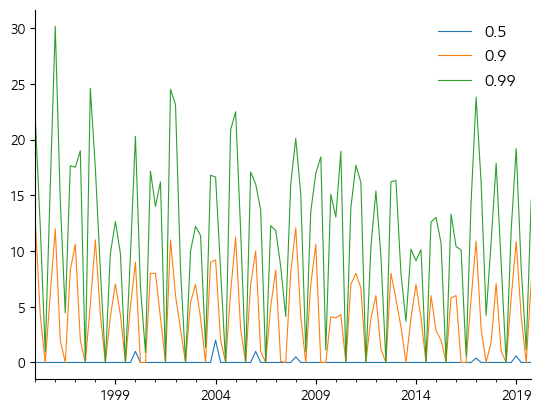

In [18]:
(snow
 .resample('Q')
 .quantile([0.5,0.9,0.99]) # creates a multilevel index of date then quantile
 .unstack() # moves inner index level to columns
 .iloc[-100:] # trim the data for the last 100 points
 .plot()
);

### Bar Plots
In a close second to line plots for their ease of understanding and usefullness are bar plots.  Traditionally used for categorical data aggregations, these can be used to compare just about any quantitative measure across a category.  Since our snow Series is a numerical column, we will need to use the datetime index to create a category to compare.

In [19]:
season2017 = (snow.loc['2016-10':'2017-05'])

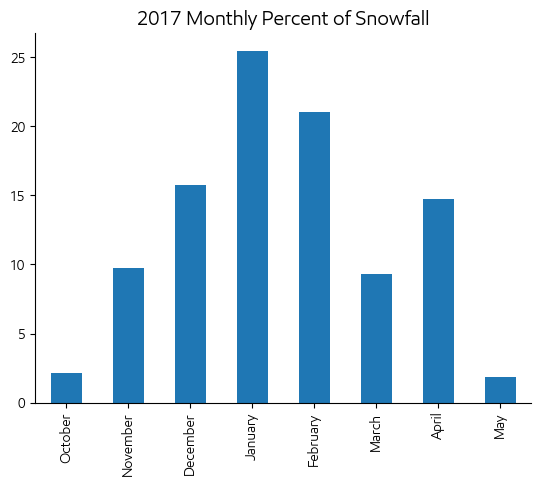

In [20]:
(season2017
 .resample('M') # monthly snowfall
 .sum() # sum of the monthly values
 .div(season2017.sum())# ratioed against the total season snowfall
 .mul(100) # whole number percentage
 .rename(lambda idx: idx.month_name()) # pass the current Series index as argument and convert to month name (readable)
 .plot
 .bar(title='2017 Monthly Percent of Snowfall',)
);

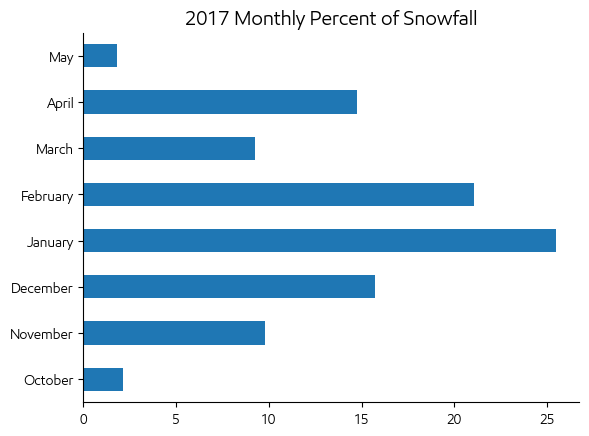

In [21]:
(season2017
 .resample('M') # monthly snowfall
 .sum() # sum of the monthly values
 .div(season2017.sum())# ratioed against the total season snowfall
 .mul(100) # whole number percentage
 .rename(lambda idx: idx.month_name()) # pass the current Series index as argument and convert to month name (readable)
 .plot
 .barh(title='2017 Monthly Percent of Snowfall',)
);

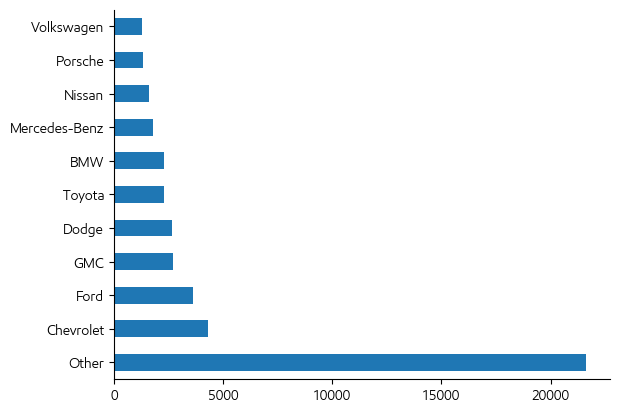

In [22]:
top10 = make.value_counts().index[:10]
(make
 .where(make.isin(top10),'Other')
 .value_counts()
 .plot
 .barh()
);

### Pie Plots
Not anyone's favorite plot, but they have some uses.  The Pie plot is best used to show differences between categories when there are limited categories and the differences are obvious.  Generally labeling is needed to help make them most effective for communicating details.

<AxesSubplot: title={'center': '2017 Monthly percent of Snowfall'}, ylabel='SNOW'>

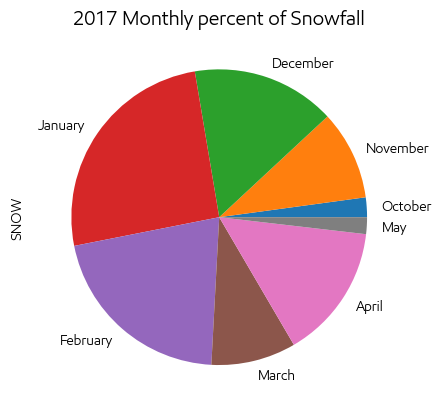

In [23]:
(season2017
 .resample('M')
 .sum()
 .div(season2017.sum())
 .mul(100)
 .rename(lambda idx: idx.month_name())
 .plot
 .pie(title='2017 Monthly percent of Snowfall')
)

### Styles
Matplotlib which is the plotting engine underneath the hood for pandas has a number of style options.  To improve the default plotting experience, you can select alternate default styles and customize as well.

In [24]:
import seaborn as sns

In [25]:
color_palette = ['#440154','#482677','#404788','33638d','#287d8e','1f968b','#29af7f','#55c667','#73d055','#b8de29',
                 '#fde725']

In [26]:
import matplotlib

In [27]:
fp = matplotlib.font_manager.FontProperties(fname='/Fonts/roboto/Roboto-Condensed.ttf')

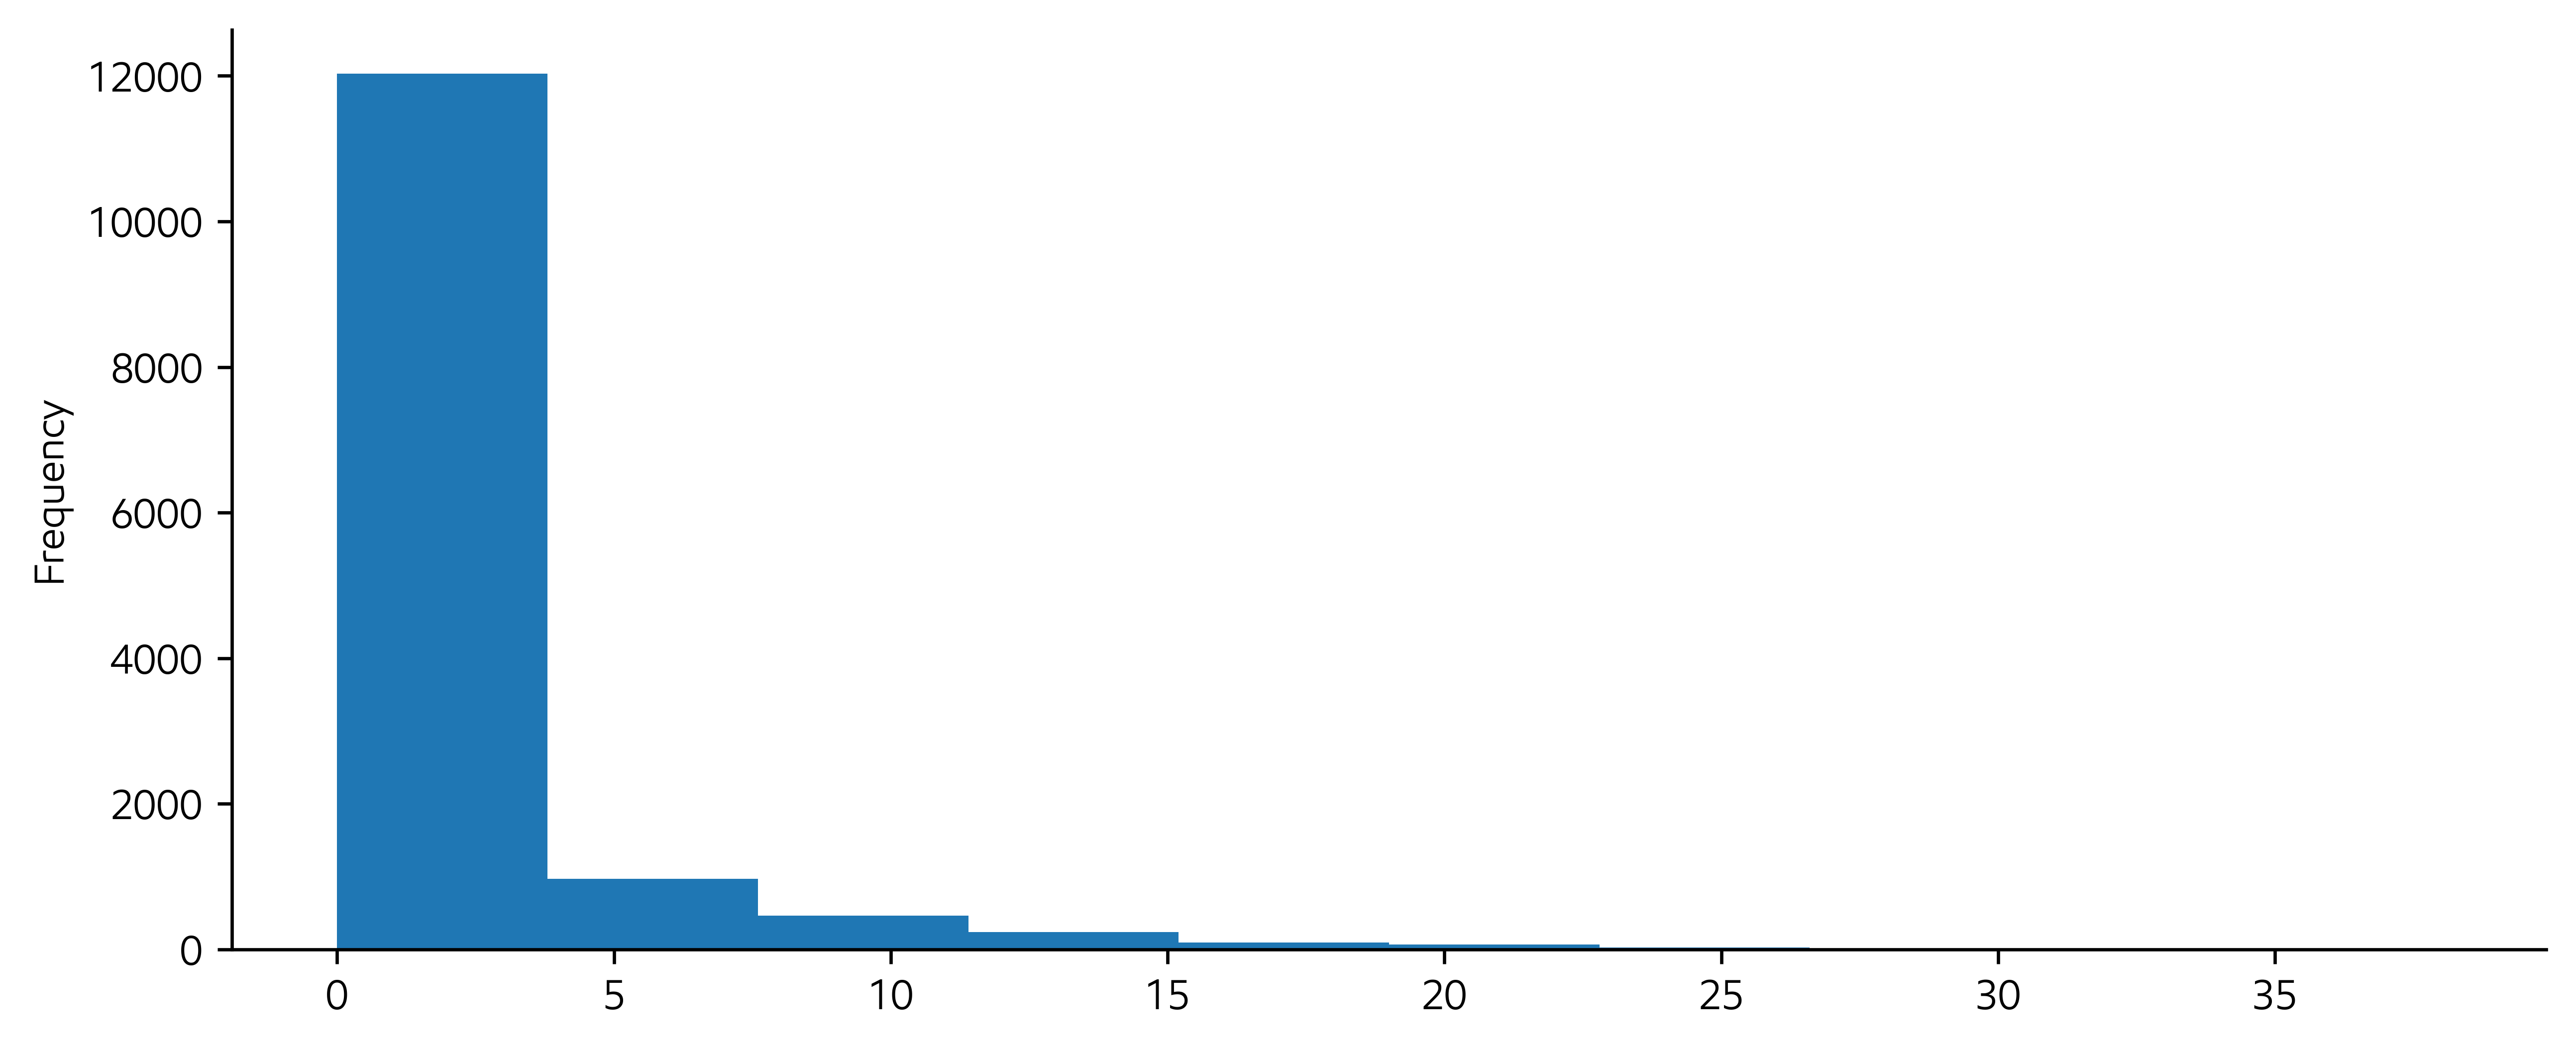

In [28]:
with sns.plotting_context(rc=dict(font='Roboto', palette=color_palette)):
    fig, ax = plt.subplots(dpi=600, figsize=(10,4))
    snow.plot.hist()
    fig.savefig('snowhist.png',dpi=600,bbox_inches='tight')

## Ch14 Pset
Using a dataset of your choice:
1. Create a histogram from a numeric column.  Change the bin size.
2. Create a box plot from a numeric column
3. Create a kernel density plot from a numeric column.
4. Create a line plot from a numeric column
5. Create a bar plot from a frequency count of a categorical column
6. Create a pie plot from a frequency count of a categorical column

In [29]:
scoring = (fifa
 .assign(date = lambda df: pd.to_datetime(df.date))
 .set_index('date')
 .assign(total_goals = lambda df: df.home_team_score + df.away_team_score)
 .total_goals
)

<AxesSubplot: ylabel='Frequency'>

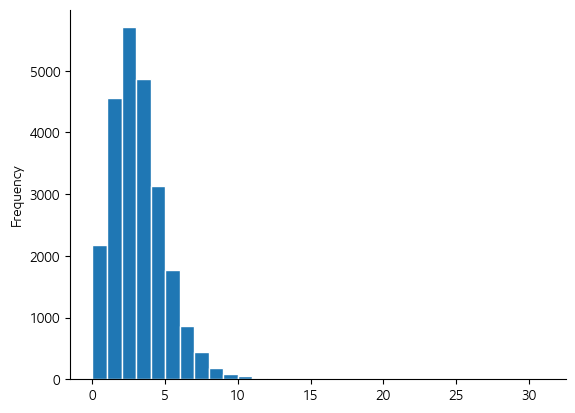

In [30]:
(scoring
#  [scoring>0]
 .plot
 .hist(bins=31, edgecolor='white') #31 bins because 31 was max value
)

<AxesSubplot: >

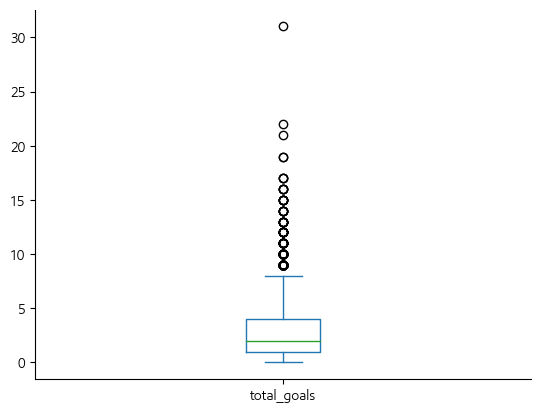

In [31]:
(scoring
#  [scoring>0]
 .plot
 .box()
)

<AxesSubplot: ylabel='Density'>

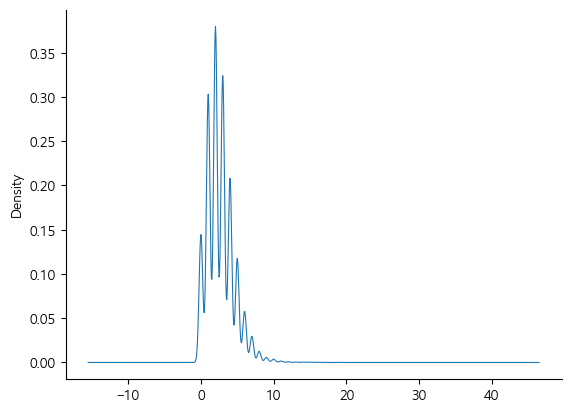

In [32]:
(scoring
#  .resample('D')
#  .mean()
#  [lambda s: (s.index.month==8)]
 .plot
 .kde()
)

<AxesSubplot: xlabel='date'>

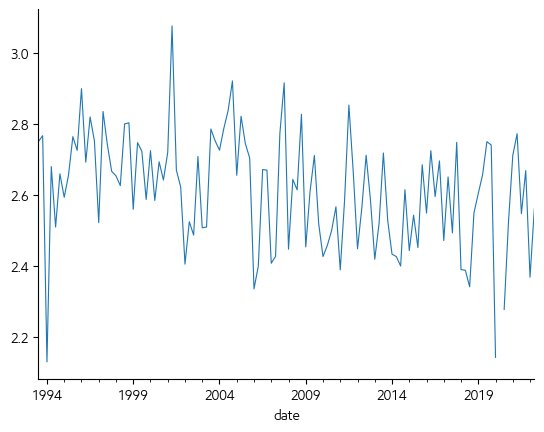

In [33]:
(scoring
  [lambda s: (s<10)]
 .resample('Q')
 .mean()
 .plot
 .line()
)

<AxesSubplot: >

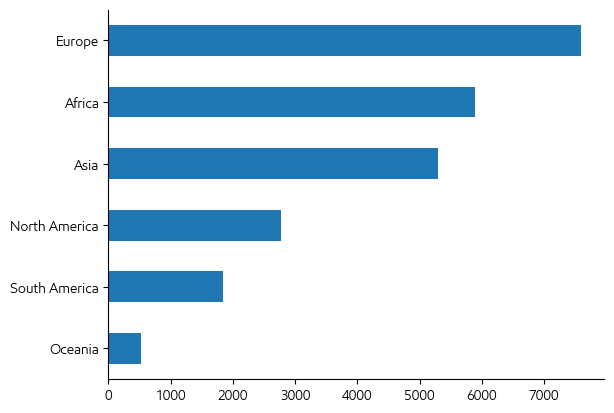

In [34]:
(fifa
 .home_team_continent
 .value_counts(ascending=True)
#  [-10:]
 .plot
 .barh()
)

<AxesSubplot: ylabel='home_team_continent'>

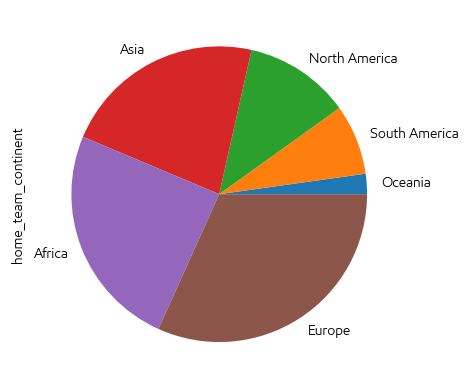

In [35]:
(fifa
 .home_team_continent
 .value_counts(ascending=True)
#  [-10:]
 .plot
 .pie()
)

# Chapter 15: Categorical data
Textutual data, and its subset, categorical data, has specific value in interogating datasets.  Categorical data by definition repeats, and gives users indirect frequency data.  This can provide unexpected insights into the behavior associated with a given domain.

## Categorical Data
Since general text data has already been evaluated, this section will focus on repeating text data types or categorical data.  This can be hidden in a datetime column or more explicit in a labeling column.  There a few flavors:
- nominal values: repeated unordered, e.g. colors (red, yellow, blue)
- ordinal values: ordered repeated, e.g. shirt size (S, M, L)
- convert values: binned numerical data, e.g. the bins (0-1, 1-2, 2-3)

In [36]:
# categorical dataset
make

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
45639        Subaru
45640        Subaru
45641        Subaru
45642        Subaru
45643        Subaru
Name: make, Length: 45644, dtype: object

### Frequency Counts
How oftent a description is present in the dataset can be a handy piece of information.  The cardinality is an indication of how many unique values there are out of the total set.  A non unique column is not cardinal, and therefore is not categorical.

In [37]:
make.value_counts()

Chevrolet           4333
Ford                3644
GMC                 2724
Dodge               2659
Toyota              2311
                    ... 
London Taxi            1
Excalibur Autos        1
ASC Incorporated       1
Mahindra               1
Qvale                  1
Name: make, Length: 141, dtype: int64

In [38]:
# number of values vs number of unique values
make.shape, make.nunique()

((45644,), 141)

### Category Benefits
The first benefit, and the most significant one, of converting to categorical data is that is takes up less memory.  This is sometimes critical on large datasets.  

In [39]:
cat_make = make.astype('category')

In [40]:
make.memory_usage(deep=True)

2891562

In [41]:
cat_make.memory_usage(deep=True)

105200

> Benefit number two: Computations are improved with the memory advantage and some rules which can be embedded

In [42]:
%%timeit
cat_make.str.upper()

691 µs ± 128 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [43]:
%%timeit
make.str.upper()

18.9 ms ± 8.69 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


> note: str operations do not return categorical data.  They return text.  Binning functions do however return categorical data.

### Conversion to Ordinal
Beyond the basic categorical types, there are ordinal types which have an inherent order to them.  S, M, L being the typical example.  Alphabetical is another ordinal basis.

In [44]:
make_type = pd.CategoricalDtype(categories=sorted(make.unique()), ordered=True)
ordered_make = make.astype(make_type)

In [45]:
ordered_make

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
45639        Subaru
45640        Subaru
45641        Subaru
45642        Subaru
45643        Subaru
Name: make, Length: 45644, dtype: category
Categories (141, object): ['AM General' < 'ASC Incorporated' < 'Acura' < 'Alfa Romeo' ... 'Volvo' < 'Wallace Environmental' < 'Yugo' < 'smart']

A benefit of ordinal categoricals is that you can specific a lexical order to the items, which then allows reducing/aggregation functions to work on the resulting Series.  You can specify custom orders to your data versus defaulting to alphabetical.  

In [46]:
ordered_make.max()

'smart'

In [47]:
ordered_make.min()

'AM General'

In [48]:
try:
    cat_make.max()
except:
    print('Not an ordinal categorical dtype')

Not an ordinal categorical dtype


### The .cat Accessor
There are methods attached to the .cat attribute accessor for a Series.  
- Rename the series: use the .rename_categories
- Reorder the series: use the .reorder_categories

In [49]:
cat_make.cat.rename_categories([c.lower() for c in cat_make.cat.categories])

0        alfa romeo
1           ferrari
2             dodge
3             dodge
4            subaru
            ...    
45639        subaru
45640        subaru
45641        subaru
45642        subaru
45643        subaru
Name: make, Length: 45644, dtype: category
Categories (141, object): ['am general', 'asc incorporated', 'acura', 'alfa romeo', ..., 'volvo', 'wallace environmental', 'yugo', 'smart']

In [50]:
ordered_make.cat.rename_categories({c:c.lower() for c in ordered_make.cat.categories})

0        alfa romeo
1           ferrari
2             dodge
3             dodge
4            subaru
            ...    
45639        subaru
45640        subaru
45641        subaru
45642        subaru
45643        subaru
Name: make, Length: 45644, dtype: category
Categories (141, object): ['am general' < 'asc incorporated' < 'acura' < 'alfa romeo' ... 'volvo' < 'wallace environmental' < 'yugo' < 'smart']

In [51]:
# previously the order was being affected by case, here we incorporated the key str.lower to ignore case
ordered_make.cat.reorder_categories(sorted(cat_make.cat.categories, key=str.lower)).max()

'Yugo'

### Category dtype gotchas
The Category data types helps in a lot of ways, but it has a few unexpected behaviors which need to be noted.  It generally includes all categories on aggregation calls, even if they are not present in the data being interogated.  The view below strips all but the first 100 records from the car Make series, which was originally 40k rows long.  

In [52]:
# 141 entries, even though most are zero
ordered_make.iloc[:100].value_counts()

Dodge                        17
Ford                          8
Oldsmobile                    8
Buick                         7
Mazda                         5
                             ..
Grumman Olson                 0
Grumman Allied Industries     0
Goldacre                      0
Geo                           0
smart                         0
Name: make, Length: 141, dtype: int64

In [53]:
# still showing 141 entries
(cat_make
 .iloc[:100]
 .groupby(cat_make.iloc[:100])
 .first()
)

make
AM General                            NaN
ASC Incorporated                      NaN
Acura                                 NaN
Alfa Romeo                     Alfa Romeo
American Motors Corporation           NaN
                                  ...    
Volkswagen                     Volkswagen
Volvo                               Volvo
Wallace Environmental                 NaN
Yugo                                  NaN
smart                                 NaN
Name: make, Length: 141, dtype: category
Categories (141, object): ['AM General', 'ASC Incorporated', 'Acura', 'Alfa Romeo', ..., 'Volvo', 'Wallace Environmental', 'Yugo', 'smart']

In [54]:
# using the text/object/string type only returns 25 because no assigned categories
(make
 .iloc[:100]
 .groupby(make.iloc[:100])
 .first()
)

make
Alfa Romeo          Alfa Romeo
Audi                      Audi
BMW                        BMW
Buick                    Buick
CX Automotive    CX Automotive
Cadillac              Cadillac
Chevrolet            Chevrolet
Chrysler              Chrysler
Dodge                    Dodge
Ferrari                Ferrari
Ford                      Ford
Hyundai                Hyundai
Infiniti              Infiniti
Lexus                    Lexus
Mazda                    Mazda
Mercury                Mercury
Nissan                  Nissan
Oldsmobile          Oldsmobile
Plymouth              Plymouth
Pontiac                Pontiac
Rolls-Royce        Rolls-Royce
Subaru                  Subaru
Toyota                  Toyota
Volkswagen          Volkswagen
Volvo                    Volvo
Name: make, dtype: object

In [55]:
# resolve this problem using the observed parameter in aggregation calls, using len to demo
len(cat_make
 .iloc[:100]
 .groupby(cat_make.iloc[:100], observed=True)
 .first()
)

25

> Category Creation: Binning and calling iloc or loc with a list will yield category data, even if a single value is returned.

In [56]:
# returns category on categorical data
ordered_make.iloc[[0]]

0    Alfa Romeo
Name: make, dtype: category
Categories (141, object): ['AM General' < 'ASC Incorporated' < 'Acura' < 'Alfa Romeo' ... 'Volvo' < 'Wallace Environmental' < 'Yugo' < 'smart']

In [57]:
# returns a scalar string
ordered_make.iloc[0]

'Alfa Romeo'

In [58]:
# string will return origination dtype
make.iloc[[0]]

0    Alfa Romeo
Name: make, dtype: object

### Generalization
Generalizing and restricting categories is a helpful process to improve data exploration and analysis.  This is especially useful using the .where() method to facilitate this generalizing process, especially when dealing with string data.

In [59]:
def generalize_topn(ser, n: int=5, other: str='Other'):
    topn = ser.value_counts().index[:n]
    if isinstance(ser.dtype, pd.CategoricalDtype):
        ser = ser.cat.set_categories(topn.set_categories(list(topn)+[other]))
    return ser.where(ser.isin(topn), other)

In [60]:
cat_make.pipe(generalize_topn, n=20, other='NA')

0            NA
1            NA
2         Dodge
3         Dodge
4        Subaru
          ...  
45639    Subaru
45640    Subaru
45641    Subaru
45642    Subaru
45643    Subaru
Name: make, Length: 45644, dtype: category
Categories (21, object): ['Chevrolet', 'Ford', 'GMC', 'Dodge', ..., 'Pontiac', 'Volvo', 'Chrysler', 'NA']

Another common generalization of data is to set the hierachical relationship.  For this example, the effort is focused on applying country to the make of the vehicle, but only for the US and Germany.

In [61]:
def generalize_mapping(ser, mapping: dict, default: str):
    seen = None
    res = ser.astype(str) # convert series to string type
    for old, new in mapping.items(): # use values in dictionary
        mask = ser.str.contains(old) # set mask value to look for make in dict keys, set True or False
        if seen is None:
            seen = mask
        else:
            seen |= mask
        res = res.where(~mask, new)
    res = res.where(seen, default)
    return res.astype('category')

In [62]:
generalize_mapping(cat_make, {'Ford':'US','Tesla':'US','Chevrolet':'US','Dodge':'US','Oldsmobile':'US',
                              'Plymouth':'US','BMW':'German'},'Other')

0        Other
1        Other
2           US
3           US
4        Other
         ...  
45639    Other
45640    Other
45641    Other
45642    Other
45643    Other
Name: make, Length: 45644, dtype: category
Categories (3, object): ['German', 'Other', 'US']

In [63]:
cat_make.map({'Ford':'US','Tesla':'US','Chevrolet':'US','Dodge':'US','Oldsmobile':'US',
              'Plymouth':'US','BMW':'German'}).value_counts()

US        11748
German     2305
Name: make, dtype: int64

### Psets
With a dataset of your choice:
1. Convert a text column into a categorical column.  How much memory do you save?
2. Convert a numeric column into a categorical column.  How much memory do you save?
3. Use the generalize_topn function to limit the amount of categorization in your column.  How much memory do you save?

In [68]:
((fifa
 .home_team_continent
 .memory_usage(deep=True)
)-
(fifa
 .home_team_continent
 .astype('category')
 .memory_usage(deep=True)
))

1504742

In [70]:
((fifa
 .home_team_score
 .memory_usage(deep=True)
)-
(pd.cut(fifa
 .home_team_score, bins=10)
 .memory_usage(deep=True)
))

166987

In [71]:
((fifa
 .home_team
 .memory_usage(deep=True)
)-
(fifa
 .home_team
 .pipe(generalize_topn, n=20, other='Other'))
 .memory_usage(deep=True)
)

66681

In [72]:
(fifa
 .home_team
 .pipe(generalize_topn, n=20, other='Other')
)

0                 Other
1                Brazil
2                 Other
3                 Other
4                 Other
              ...      
23916             Other
23917             Other
23918             Other
23919             Japan
23920    Korea Republic
Name: home_team, Length: 23921, dtype: object